## Bin / Block Positional Utility Tests

In [20]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import model as mdl   # this is to allow reload(mdl) to function
import run_model as rm

In [91]:
reload(mdl)

<module 'model' from '/home/arran/Documents/ABM/ABM_RocketMan/model.py'>

In [41]:
seating_bins = np.ones((14, 22))

# first three rows very undisirable
seating_bins[0:3, 7:] *= 0.05
seating_bins[0:3, 0:7] *= 0.0

# back five rows somewhat desirable
seating_bins[-5:, 7:] *= 0.5
seating_bins[-5:, 0:7] *= 0.2

# middle section to the left also quite desirable
seating_bins[3:-5, 0:7] *= 0.7

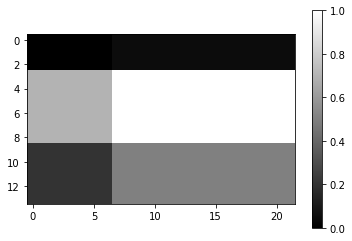

In [43]:
plt.imshow(seating_bins, cmap='gray')
plt.colorbar()
plt.show()

In [207]:
test_theater = mdl.ClassroomDesign(pos_utilities=seating_bins.T)
students = 150

model_parameters = [0.3,   # position 
                    1,   # friends
                    0,   # sociability
                    1]   # accessability

degree_sequence = rm.get_default_degree_sequence(students)
sociability_sequence = rm.get_default_sociability_sequence(students)

test_model = mdl.ClassroomModel(test_theater, model_parameters, 
                                degree_sequence=degree_sequence, 
                                sociability_sequence=sociability_sequence,
                                deterministic_choice=True)

In [208]:
for i in range(test_model.max_num_agents):
    test_model.step()

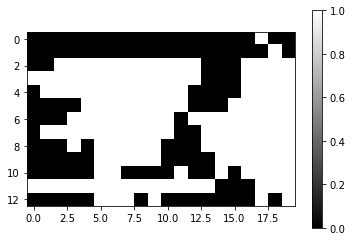

In [209]:
plt.imshow(test_model.get_binary_model_state(), cmap='gray')
plt.colorbar()
plt.show()

In [223]:
iterations = 50
final_seating = np.zeros(test_model.get_binary_model_state().shape)

for i in range(iterations):
    model_parameters = [0.3,   # position 
                    1,   # friends
                    0,   # sociability
                    1]   # accessability
    
    model = mdl.ClassroomModel(test_theater, model_parameters, 
                                degree_sequence=degree_sequence, 
                                sociability_sequence=sociability_sequence,
                                deterministic_choice=True,
                                seed=i**2+5)
    
    for j in range(students):
        model.step()
    
    final_seating += model.get_binary_model_state()
    print(i, end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

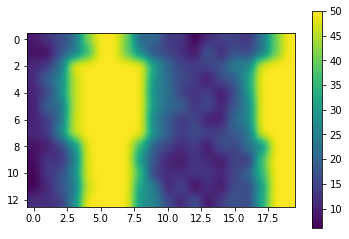

In [231]:
plt.imshow(final_seating, interpolation='gaussian')
plt.colorbar()
plt.show()